# **Image Generation with DeepInfraImgGenModel**

### **Introduction:**  
DeepInfra provides a suite of cutting-edge image generation models optimized for speed, creativity, and efficiency, enabling advanced visual content generation tasks. DeepInfra's models, such as **stabilityai/sdxl-turbo**, **black-forest-labs/FLUX-1-dev**, and **black-forest-labs/FLUX-1-schnell**, are designed for developers and designers who need high-performance, low-latency solutions for generating high-quality images.  

This notebook guides users through setting up and utilizing DeepInfra's image generation models for a variety of use cases.

This notebook will:  

- Introduce the setup and initialization of DeepInfraImgGenModel within **Swarmauri**.  
- Demonstrate **synchronous image generation**, **asynchronous** and **batch processing** for multiple prompts.  
- Provide examples showcasing DeepInfra's model versatility for creative applications, including design, marketing, and gaming.  

By the end of this notebook, you will have a comprehensive understanding of how to use DeepInfra's image generation models to create stunning, high-quality visuals efficiently and effectively.  

# **Setup and Configuration**

## Import the DeepInfraImgGenModel class

In [3]:
from swarmauri.llms.concrete.DeepInfraImgGenModel import DeepInfraImgGenModel

### Load your API KEY from your environment variables
- Make sure you have python-dotenv installed if not, run `pip install python-dotenv` so you can install it.
- Get your API KEY [HERE](https://deepinfra.com/dash/api_keys)

In [4]:
import os
from dotenv import load_dotenv
load_dotenv()

DEEPINFRA_API_KEY = os.getenv("DEEPINFRA_API_KEY")

### Initialize DeepInfraImgGen Model
- Note: You can as well input your api key directly, but it's better to load from env file
- Also, the `name` arguments is an optional argument that allows you to input a model from the list of allowed_models.

In [5]:
model = DeepInfraImgGenModel(api_key=DEEPINFRA_API_KEY, name="stabilityai/stable-diffusion-2-1") 

### Generate Image using the `generate_image_base64` method from the DeepInfraImgGenModel class

In [6]:
# Add a simple prompt message
input_data = "A dog playing with a man"

# Generate the image in base64 format
image_base64 = model.generate_image_base64(input_data)

print(image_base64)

/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAQABAADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDyu43bs1e0m4jjlHm9M1TmyeMdKjgcI3zVJR1Ov3FkdOXycbscVxfLNU1zMZG2gkrSRx8An1oEeheBfD5nMN3LF+7X9a9K1e/sdI0suCoZF4APWvOdH8VLp2lpbxLufGMCs2+1Ge9dpLqYn0XPApjI9RuW1a7e4clVJO0VhyuY

As you can see, the `DeepInfraImgGenModel` returns base64-encoded strings of the generated images.  

To display the image or save it to a file, you can leverage any of the utility functions provided in `swarmauri/utils`. Swarmauri offers a wide range of helpful utilities designed to simplify tasks when building AI applications.  

Below, we will use the `base64_to_in_memory_img` function from `swarmauri/utils` to display the base64 string as an image. This demonstrates how easy it is to convert the generated output into a usable format with the provided tools.

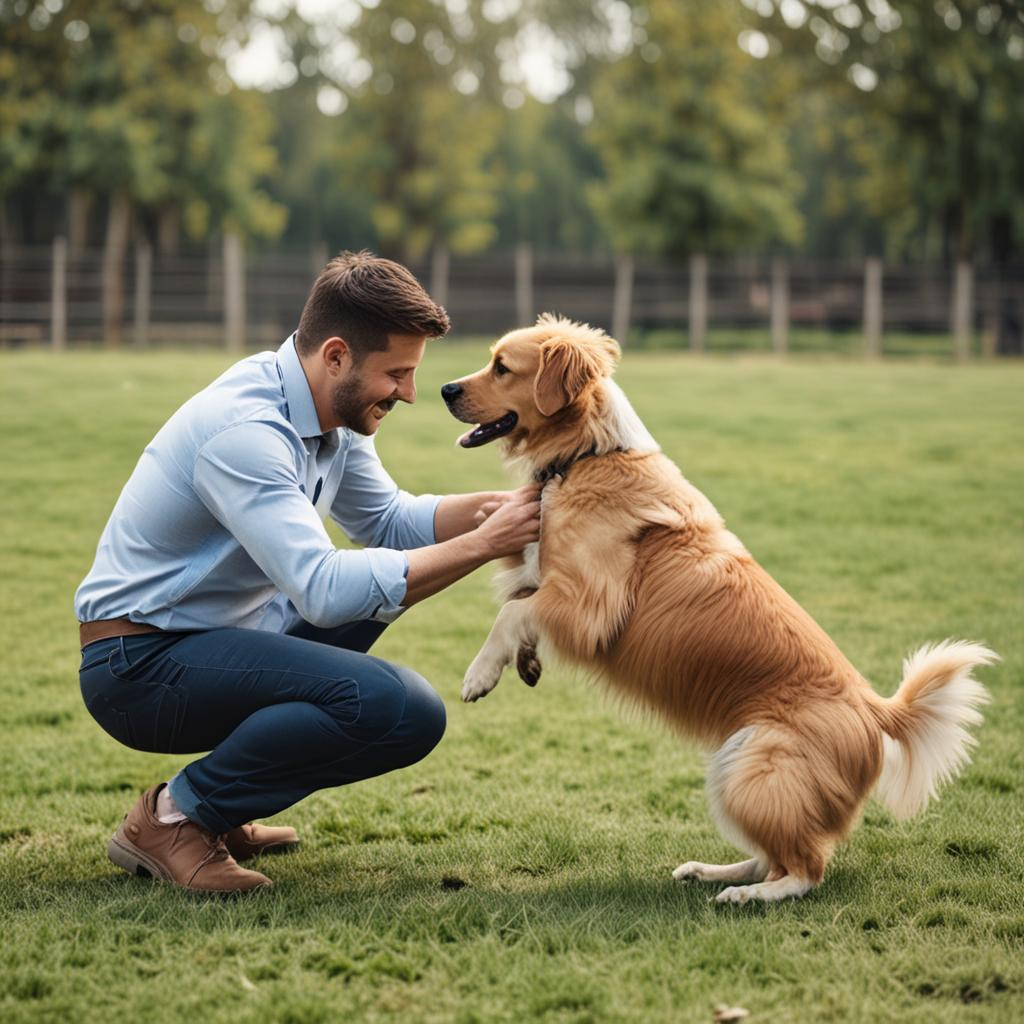

In [14]:
from swarmauri.utils.base64_to_in_memory_img import base64_to_in_memory_img
from IPython.display import display

actual_image = base64_to_in_memory_img(image_base64)
display(actual_image)  # Displays the image in the notebook 

#### To generate the image ascynchronously, use the code below

Run the code below and then convert the base64 string to image if you want to display it just like we did above.

In [18]:
image_base64 = await model.agenerate_image_base64(prompt=input_data)

## Generating batch images 

To generate images in batch, we just have to use the `batch_base64` method

In [21]:
prompts = [
    "A python programmer",
    "A laundry shop banner",
    "A programmer drinking coffee",
]

In [22]:
result_base64_images = model.batch_base64(prompts=prompts)

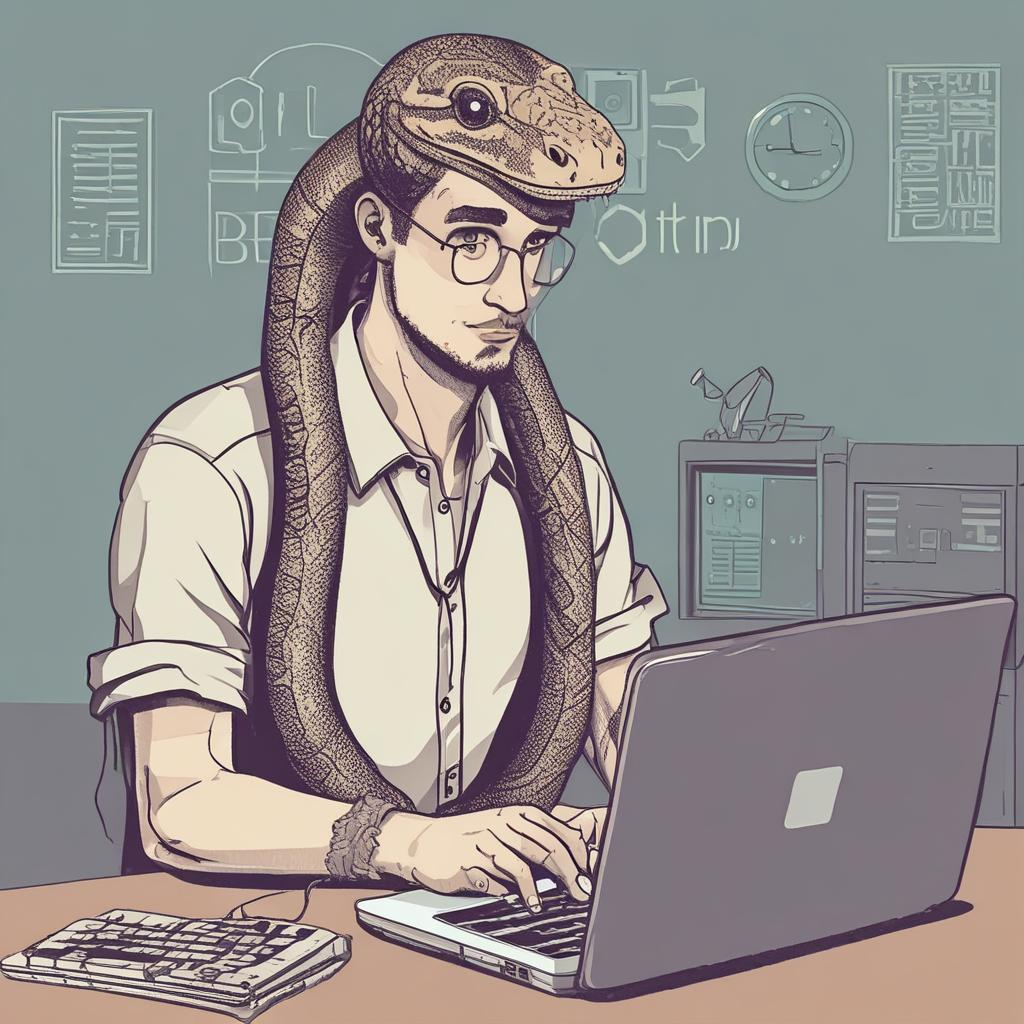

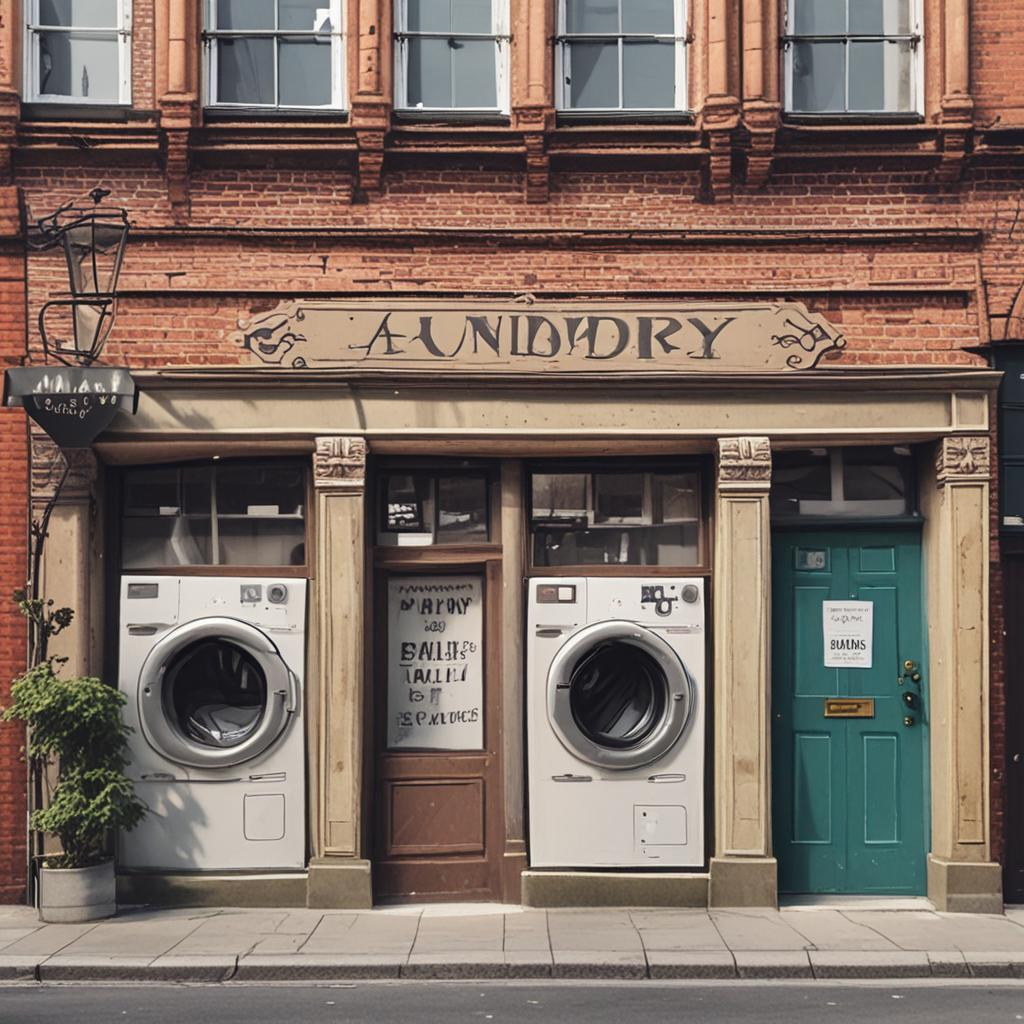

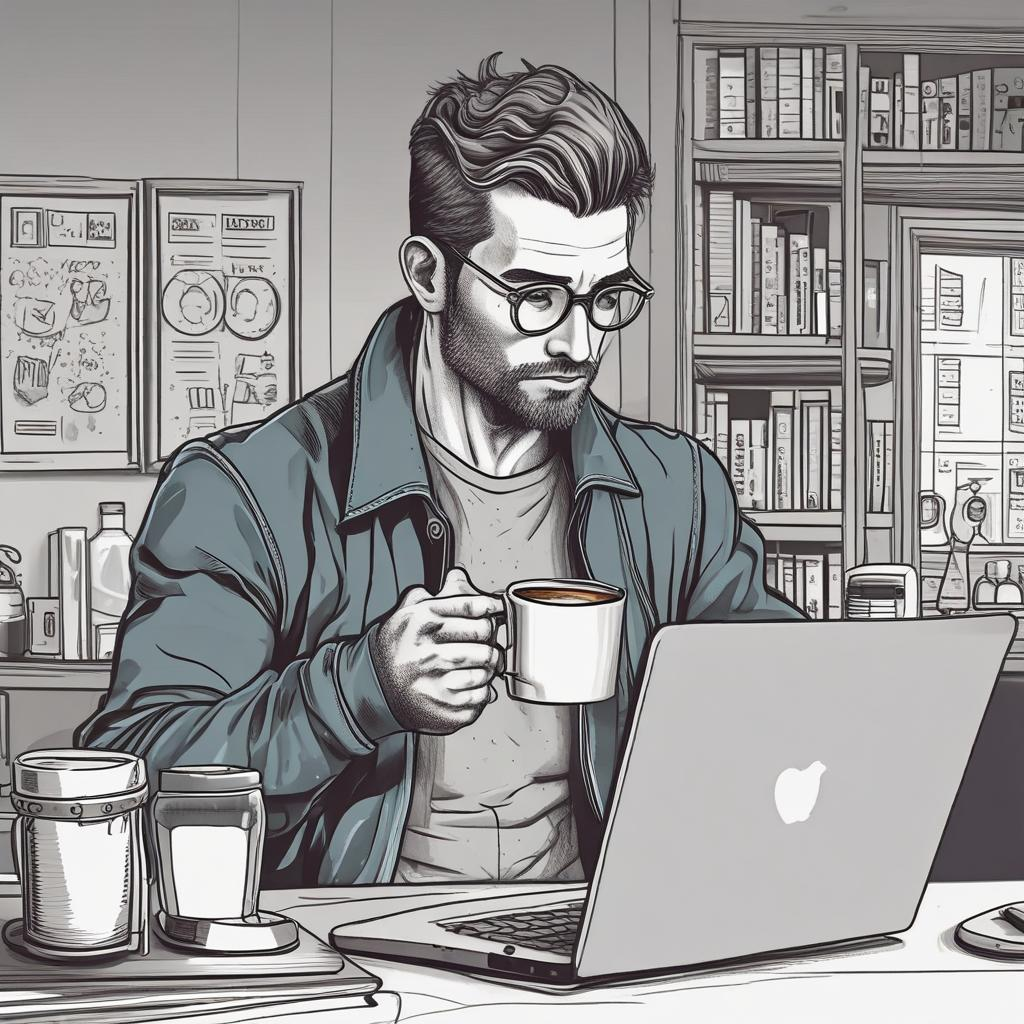

In [24]:
for base64 in result_base64_images:
    actual_image = base64_to_in_memory_img(base64)
    display(actual_image)

To asynchronously generate images in batch, we just have to use the `abatch_base64` method. 
Run the code below to asynchronously generate images in batch.

In [ ]:
result_base64_images = await model.abatch_base64(prompts=prompts)

### Quick Note:  

Swarmauri provides a collection of utility functions in the `swarmauri/utils` module to enhance your productivity, especially when working with image generation classes. These functions simplify conversions between various image formats and locations, making it easier to handle and process images efficiently.  

Here are some key utility functions you might find useful:  

- **`base64_to_file_path`**: Save a base64-encoded image string to a file.  
- **`base64_to_img_url`**: Convert a base64-encoded image string to a URL by uploading it to ImgBB.  
- **`file_path_to_base64`**: Convert an image file path to a base64-encoded string.  
- **`file_path_to_img_url`**: Upload an image from a file path to ImgBB and get a URL.  
- **`file_path_to_in_memory_img`**: Load an image from a file path as an in-memory image object.  
- **`img_url_to_base64`**: Convert an image URL to a base64-encoded string.  
- **`img_url_to_file_path`**: Download an image from a URL and save it to a file.  
- **`img_url_to_in_memory_img`**: Download an image from a URL and load it as an in-memory image object.  
- **`in_memory_img_to_base64`**: Convert an in-memory image object to a base64-encoded string.  
- **`in_memory_img_to_file_path`**: Save an in-memory image object to a file.  
- **`in_memory_img_to_img_url`**: Upload an in-memory image object to ImgBB and get a URL.  

These utilities are designed to streamline your workflow, making it easier to handle images at different stages of processing or transfer. Make sure to explore and integrate them into your projects to save time and effort.

# Notebook Metadata

In [1]:
from swarmauri.utils import print_notebook_metadata

metadata = print_notebook_metadata.print_notebook_metadata("Victory Nnaji", "3rd-Son")
print(metadata) 

Author: Victory Nnaji
GitHub Username: 3rd-Son
Notebook File: Notebook_02_Image_Generation_with_DeepInfraImgGenModel.ipynb
Last Modified: 2024-12-24 10:46:42.723824
Platform: Darwin 24.1.0
Python Version: 3.11.11 (main, Dec 11 2024, 10:25:04) [Clang 14.0.6 ]
Swarmauri Version: 0.5.2
None
